# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

path = kagglehub.dataset_download("anandshaw2001/consumer-complaints")

print("Path:", path)

Path: /root/.cache/kagglehub/datasets/anandshaw2001/consumer-complaints/versions/1


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from scipy.stats import zscore
from collections import Counter

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
data = pd.read_csv("/root/.cache/kagglehub/datasets/anandshaw2001/consumer-complaints/versions/1/datatset_consumer_complaints.csv")
data.head()

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year,QTR (US FLY)
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015,Q4
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014,Q1
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014,Q4
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,WA,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015,Q1
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,VA,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015,Q4


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0    ID                       14000 non-null  int64 
 1   Company                   14000 non-null  object
 2   Product                   14000 non-null  object
 3   Issue                     14000 non-null  object
 4   State                     13890 non-null  object
 5   Submitted via             14000 non-null  object
 6   Date received             14000 non-null  object
 7   Date resolved             14000 non-null  object
 8   Timely response?          14000 non-null  object
 9   Consumer disputed?        14000 non-null  object
 10  state name                13843 non-null  object
 11  Date received.1           14000 non-null  object
 12  Date resolved.1           14000 non-null  object
 13  Resolution time(in days)  14000 non-null  int64 
 14  Year                  

In [7]:
data.isna().sum()

,0
ID,0
Company,0
Product,0
Issue,0
State,110
Submitted via,0
Date received,0
Date resolved,0
Timely response?,0
Consumer disputed?,0


In [8]:
print("Duplicate row: ", data.duplicated().sum())

Duplicate row:  0


In [9]:
data.describe()

,ID,Resolution time(in days),Year
count,1.400000e+04,14000.000000,14000.000000
mean,1.266522e+06,2.006000,2014.656571
std,5.396102e+05,6.373058,1.051118
min,2.162990e+05,-1.000000,2013.000000
25%,8.052365e+05,0.000000,2014.000000
50%,1.310814e+06,0.000000,2015.000000
75%,1.744076e+06,2.000000,2016.000000
max,2.207193e+06,286.000000,2016.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Drop Missing Values

In [10]:
data = data.dropna()

Choosing Relevant Column

In [11]:
selected_features = ["Product", "Issue", "Company", "State", "Consumer disputed?"]
data = data[selected_features]

Encode Categorical Column

In [12]:
label_encoders = {}
encoded_data = data.copy()
for col in data.columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le

Standardize

In [13]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(encoded_data)

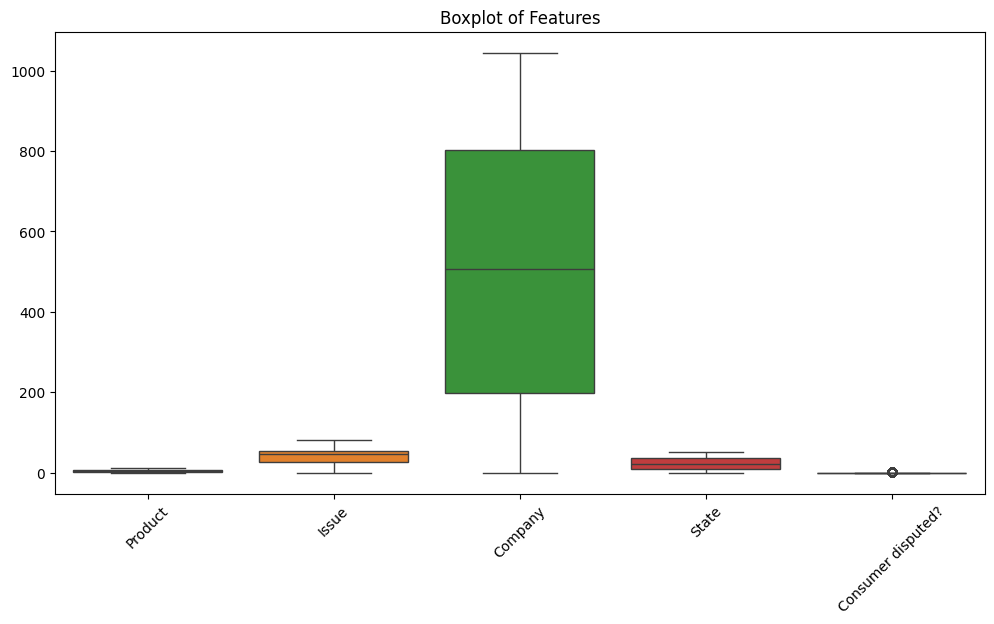

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=encoded_data)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [15]:
z_scores = np.abs(zscore(data_scaled))
data_filtered = data_scaled[(z_scores < 3).all(axis=1)]

<Figure size 1200x600 with 0 Axes>

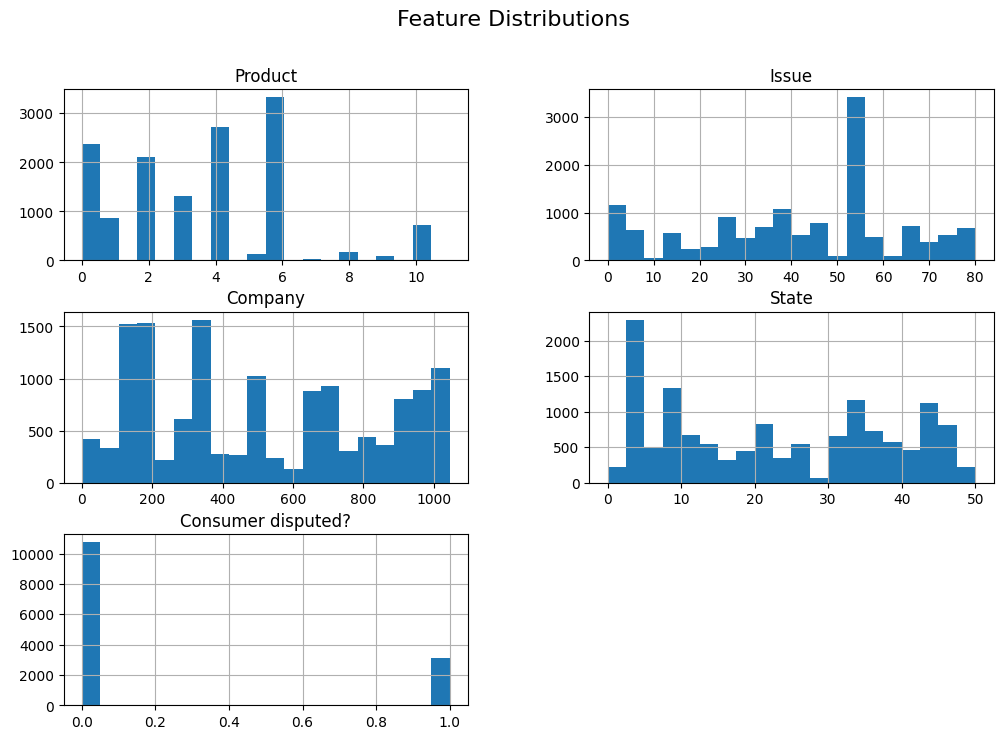

In [17]:
plt.figure(figsize=(12, 6))
encoded_data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

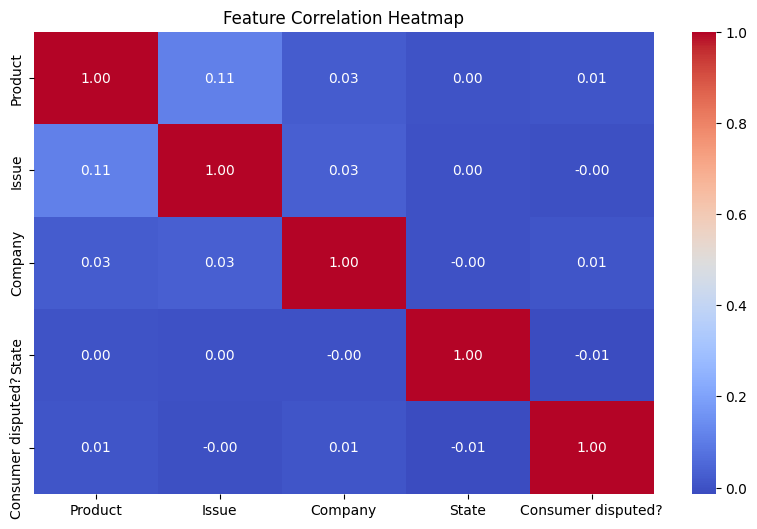

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(data_scaled, columns=data.columns).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
k_values = range(2, 10)
silhouette_scores = {}
models = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores[k] = score
    models[k] = kmeans

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [21]:
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans = models[optimal_k]
data["Cluster"] = kmeans.labels_

In [22]:
print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_scores[optimal_k]:.2f}")

Optimal number of clusters: 2
Silhouette Score: 0.41


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
initial_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
initial_labels = initial_kmeans.fit_predict(data_scaled)

In [24]:
k_values_for_features = [2, 3, 4, 5]
feature_selection_scores = {}

In [25]:
for k in k_values_for_features:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    data_selected = selector.fit_transform(data_scaled, initial_labels)

    kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_selected)
    score = silhouette_score(data_selected, labels)

    feature_selection_scores[k] = score
    print(f"SelectKBest with k={k} features - Silhouette Score: {score:.4f}")

SelectKBest with k=2 features - Silhouette Score: 0.6880
SelectKBest with k=3 features - Silhouette Score: 0.4542
SelectKBest with k=4 features - Silhouette Score: 0.3195
SelectKBest with k=5 features - Silhouette Score: 0.2422


In [26]:
optimal_k_features = max(feature_selection_scores, key=feature_selection_scores.get)
print(f"Optimal number of features: {optimal_k_features} with score {feature_selection_scores[optimal_k_features]:.4f}")

Optimal number of features: 2 with score 0.6880


In [27]:
best_selector = SelectKBest(score_func=mutual_info_classif, k=optimal_k_features)
data_selected = best_selector.fit_transform(data_scaled, initial_labels)

In [28]:
selected_indices = best_selector.get_support(indices=True)
selected_feature_names = [encoded_data.columns[i] for i in selected_indices]
print(f"Selected features: {selected_feature_names}")

Selected features: ['Company', 'Consumer disputed?']


In [29]:
cluster_range = range(2, 21)
silhouette_scores = {}
models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(data_selected)
    sil_score = silhouette_score(data_selected, labels)

    silhouette_scores[k] = sil_score
    models[k] = kmeans

    print(f"k={k}: Silhouette={sil_score:.4f}")

k=2: Silhouette=0.6801
k=3: Silhouette=0.6786
k=4: Silhouette=0.6790
k=5: Silhouette=0.6605
k=6: Silhouette=0.6632
k=7: Silhouette=0.6604
k=8: Silhouette=0.6880
k=9: Silhouette=0.6888
k=10: Silhouette=0.6762
k=11: Silhouette=0.6744
k=12: Silhouette=0.6838
k=13: Silhouette=0.7010
k=14: Silhouette=0.6787
k=15: Silhouette=0.6957
k=16: Silhouette=0.6949
k=17: Silhouette=0.6987
k=18: Silhouette=0.6981
k=19: Silhouette=0.7011
k=20: Silhouette=0.7132


In [30]:
optimal_k_clusters = max(silhouette_scores, key=silhouette_scores.get)
final_kmeans = models[optimal_k_clusters]
final_labels = final_kmeans.labels_

In [31]:
print(f"\nOptimal number of clusters: {optimal_k_clusters}")
print(f"Final Silhouette Score: {silhouette_scores[optimal_k_clusters]:.4f}")


Optimal number of clusters: 20
Final Silhouette Score: 0.7132


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

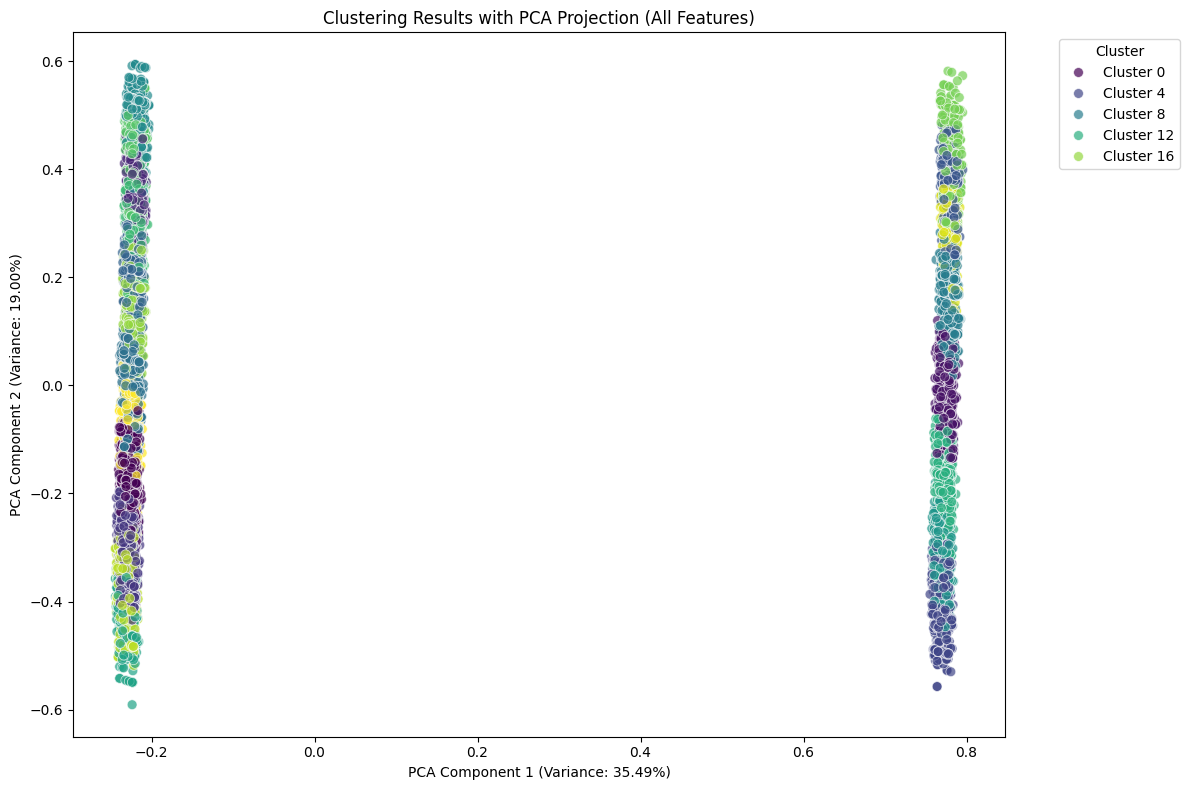

In [32]:
pca_all = PCA(n_components=2)
data_pca_all = pca_all.fit_transform(data_scaled)

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=data_pca_all[:, 0],
    y=data_pca_all[:, 1],
    hue=final_labels,  # Use your optimized cluster labels
    palette="viridis",
    alpha=0.7,
    s=50  # Slightly larger point size
)
plt.xlabel(f"PCA Component 1 (Variance: {pca_all.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PCA Component 2 (Variance: {pca_all.explained_variance_ratio_[1]:.2%})")
plt.title("Clustering Results with PCA Projection (All Features)")
legend = plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
for t in legend.texts:
    t.set_text(f"Cluster {t.get_text()}")

plt.tight_layout()
plt.savefig('pca_all_features.png', dpi=300)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [33]:
decoded_data = encoded_data.copy()
for col in label_encoders:
    decoded_data[col] = label_encoders[col].inverse_transform(encoded_data[col])

print(decoded_data.head())

            Product                                     Issue  \
0          Mortgage  Loan servicing, payments, escrow account   
1          Mortgage  Loan servicing, payments, escrow account   
2   Debt collection  Loan modification,collection,foreclosure   
3       Credit card                         Billing statement   
4  Credit reporting  Unable to get credit report/credit score   

                            Company State Consumer disputed?  
0                      PHH Mortgage    FL                 No  
1                             Ocwen    NC                 No  
2    Southwest Credit Systems, L.P.    MO                 No  
3  Continental Finance Company, LLC    WA                 No  
4                          Experian    VA                 No  


In [34]:
data_with_clusters = decoded_data.copy()
data_with_clusters["Cluster"] = final_labels

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [35]:
cluster_counts = Counter(final_labels)
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} instances ({count/len(final_labels)*100:.2f}%)")

Cluster 0: 1766 instances (12.76%)
Cluster 1: 398 instances (2.88%)
Cluster 2: 722 instances (5.22%)
Cluster 3: 1401 instances (10.12%)
Cluster 4: 523 instances (3.78%)
Cluster 5: 283 instances (2.04%)
Cluster 6: 870 instances (6.28%)
Cluster 7: 943 instances (6.81%)
Cluster 8: 501 instances (3.62%)
Cluster 9: 850 instances (6.14%)
Cluster 10: 345 instances (2.49%)
Cluster 11: 522 instances (3.77%)
Cluster 12: 511 instances (3.69%)
Cluster 13: 583 instances (4.21%)
Cluster 14: 719 instances (5.19%)
Cluster 15: 343 instances (2.48%)
Cluster 16: 751 instances (5.43%)
Cluster 17: 1225 instances (8.85%)
Cluster 18: 202 instances (1.46%)
Cluster 19: 385 instances (2.78%)


In [37]:
cluster_stats = data_with_clusters.groupby('Cluster').agg(['count'])
print(cluster_stats)

        Product Issue Company State Consumer disputed?
          count count   count count              count
Cluster                                               
0          1766  1766    1766  1766               1766
1           398   398     398   398                398
2           722   722     722   722                722
3          1401  1401    1401  1401               1401
4           523   523     523   523                523
5           283   283     283   283                283
6           870   870     870   870                870
7           943   943     943   943                943
8           501   501     501   501                501
9           850   850     850   850                850
10          345   345     345   345                345
11          522   522     522   522                522
12          511   511     511   511                511
13          583   583     583   583                583
14          719   719     719   719                719
15        

In [38]:
categorical_features = ["Product", "Issue", "Company", "State", "Consumer disputed?"]
cluster_profiles = {}

for cluster_id in sorted(cluster_counts.keys()):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
    profile = {}

    for feature in categorical_features:
        most_common = cluster_data[feature].value_counts().nlargest(3)
        total = len(cluster_data)
        profile[feature] = [(value, count, f"{count/total*100:.2f}%")
                           for value, count in most_common.items()]

    cluster_profiles[cluster_id] = profile

In [39]:
for cluster_id, profile in cluster_profiles.items():
    print(f"\nCluster {cluster_id} Profile (Size: {cluster_counts[cluster_id]}):")
    for feature, values in profile.items():
        print(f"  {feature}:")
        for value, count, percentage in values:
            print(f"    - {value}: {count} ({percentage})")


Cluster 0 Profile (Size: 1766):
  Product:
    - Credit reporting: 792 (44.85%)
    - Debt collection: 431 (24.41%)
    - Mortgage: 245 (13.87%)
  Issue:
    - Credit reporting company's investigation: 332 (18.80%)
    - Unable to get credit report/credit score: 266 (15.06%)
    - Loan servicing, payments, escrow account: 203 (11.49%)
  Company:
    - Equifax: 397 (22.48%)
    - Experian: 396 (22.42%)
    - Ditech Financial LLC: 196 (11.10%)
  State:
    - CA: 210 (11.89%)
    - FL: 167 (9.46%)
    - TX: 136 (7.70%)
  Consumer disputed?:
    - No: 1766 (100.00%)

Cluster 1 Profile (Size: 398):
  Product:
    - Mortgage: 104 (26.13%)
    - Bank account or service: 94 (23.62%)
    - Credit card: 87 (21.86%)
  Issue:
    - Loan servicing, payments, escrow account: 70 (17.59%)
    - Account opening, closing, or management: 40 (10.05%)
    - Loan modification,collection,foreclosure: 26 (6.53%)
  Company:
    - JPMorgan Chase & Co.: 233 (58.54%)
    - HSBC North America Holdings Inc.: 28 (7

# Analisis Hasil Cluster Customer Complaints
1. Cluster 1: 12,76%
Analisis: Cluster ini menunjukan pada keluhan nasabah pada permasalahan kartu kredit. Equifax dan Experian merupakan perusahaan yang paling banyak menerima komplain, namun dengan tidak ada sengketa oleh nasabah.
2. Cluster 2: 2,88%
Analisis: Cluster ini menunjukan pada keluhan hipotek dan rekening yang secara aktif disengketakan oleh nasabah. Dengan JPMorgan Chase & Co menjadi perusahaan yang paling banyak menerima keluhan.
3. Cluster 3: 5,22%
Analisis: Cluster ini menunjukan pada keluhan pada banyak layanan, namun tidak disengketakan.
4. Cluster 4: 10,12%
Analisis: Cluster ini menunjukan pada keluhan kartu kredit dan penagihan utang yang banyak ditunjukan kepada Citibank namun tidak ada sengketa oleh nasabah.
5. Cluster 5: 3,78%
Analisis: Cluster ini menunjukan pada keluhan hipotek dan kartu kredit yang disengketakan oleh nasabah
6. Cluster 6: 2,04%
Analisis: Cluster ini menunjukan pada keluhan pelaporan kredit dan rekening. Dengan semua keluhan di persengketakan.
7. Cluster 7: 6,28%
Analisis: Cluster ini menunjukan pada keluhan hipotek dengan Ocwen dan PNC Bank.
8. Cluster 8: 6,81%
Analisis: Cluster ini menunjukan keluhan pada JPMorgan Chase dalam masalah hipotek dan pinjaman dana.
9. Cluster 9: 3.62%
Analisis: Cluster ini menunjukan pada keluhan penagihan utang hipotek dan pinjaman mahasiswa. Masalah utama melibatkan layanan pinjaman, dengan California sebagai sumber pengaduan terbesar.
10. Cluster 10: 6.14%
Analisis: Cluster ini menunjukan keluhan pada Wells Fargo terkait rekening bank dan hipotek. Tidak ada pengaduan yang disengketakan, menunjukkan kemungkinan penyelesaian cepat atau konsumen yang menyerah.
11. Cluster 11: 2.49%
Analisis: Cluster ini menunjukan pada keluhan kartu kredit dengan sengketa tagihan sebagai keluhan utama.
12. Cluster 12: 3.77%
Analisis: Cluster ini menunjukan pada keluhan Penagihan utang, pinjaman mahasiswa, dan kartu kredit. Tidak ada pengaduan yang disengketakan, dengan California sebagai sumber pengaduan terbanyak.
13. Cluster 13: 3.69%
Analisis: Cluster ini menunjukan pada keluhan pelaporan kredit, dengan Equifax sebagai perusahaan utama yang disebut. Dengan semua disengketakan oleh nasabah.
14. Cluster 14: 4.21%
Analisis: Cluster ini menunjukan pada keluhan Hipotek dan penagihan utang. Masalah utama berkaitan dengan layanan pinjaman. Tidak ada pengaduan yang disengketakan, dengan Florida dan California sebagai wilayah dengan jumlah pengaduan tertinggi.
15. Cluster 15: 5.19%
Analisis: Cluster ini menunjukan pada keluhan pelaporan kredit dan rekening bank, dengan U.S. Bancorp dan TransUnion sebagai perusahaan utama yang dilaporkan. Tidak ada pengaduan yang disengketakan, dengan California sebagai wilayah dengan pengaduan terbanyak
16. Cluster 16: 2.48%
Analisis: Cluster ini menunjukan keluhan yang disengketakan terhadap Wells Fargo. Masalah utama mencakup rekening bank dan hipotek, dengan isu layanan akun dan layanan pinjaman sebagai keluhan terbesar.
17. Cluster 17: 5.43%
Analisis: Cluster ini menunjukan pada keluhan pinjaman mahasiswa dan hipotek, dengan Navient dan Nationstar Mortgage sebagai perusahaan utama. Tidak ada pengaduan yang disengketakan, dengan California melaporkan jumlah pengaduan tertinggi
18. Cluster 18: 8.85%
Analisis: Cluster ini menunjukan keluhan pada Bank of America  Masalah utama termasuk layanan pinjaman dan manajemen akun.
19. Cluster 19: 1.46%  
Analisis: Cluster ini menunjukan pada keluhan hipotek dan penagihan utang.
20. Cluster 20: 2.78%
Analisis: Cluster ini menunjukan pada keluhan penagihan utang dan hipotek.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
data_with_clusters.to_csv('Dataset_Clustering.csv', index=False)
print("Successfuly Saved New Data")

Successfuly Saved New Data
